In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df_AI=pd.read_csv(r"../Rawdat/NS_site_filtered.csv")
# === Step-by-step ===

grouped_summary_4 = (
    df_AI.groupby('Filename')  
    .filter(lambda df: len(df) >= 4)  
    .groupby('Filename')  
    .agg(
        Slope_P=('Slope', lambda x: (x > 0).mean()), 
        Mean=('Mean', 'mean'),
        Slope_Mean=('Slope', 'mean'),               
    )
    .reset_index()  
)

In [ ]:
import geopandas as gpd
df_siteg = gpd.read_file("../Rawdat/ITRDB.shp")
grouped_summary_4["Site_ID"] = grouped_summary_4["Filename"].str.replace(r"\.rwl\.csv$", "", regex=True)
dfslope_3 = pd.merge(grouped_summary_4.loc[:,'Slope_P':],df_siteg.loc[:,['Latitude', 'Longitude','Site_ID','ai_v3','Tree_Speci']])
dfslope_3_N_P = dfslope_3[(dfslope_3['Latitude']>0)]
dfslope_3_N_P = dfslope_3_N_P[(dfslope_3_N_P['ai_v3'] >0)]
mean_num = (
    dfslope_3_N_P
    .groupby(["Latitude", "Longitude"], as_index=False)
    .mean(numeric_only=True)
)

meta = (
    dfslope_3_N_P
    .sort_values(["Latitude", "Longitude"])
    .groupby(["Latitude", "Longitude"], as_index=False)
    .first()  
    [["Latitude", "Longitude", "Tree_Speci", "Site_ID"]] 
)

dfslope_3_N_P_mean = mean_num.merge(meta, on=["Latitude", "Longitude"], how="left")
# dfslope_3_N_P_mean.to_csv(r'../Rawdat/Fig/site4-71.csv', index=False)

d:\software\Anaconda3\envs\dataProcessing\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\3035746599.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. Ho

In [4]:
species_summary = (
    dfslope_3_N_P_mean
    .groupby("Tree_Speci")
    .agg(
        n_sites=("Mean", "count"),
        Mean_TGAI=("Mean", "mean"),
        Median_TGAI=("Mean", "median"),
        Mean_Slope=("Slope_Mean", "mean"),
        Median_Slope=("Slope_Mean", "median")
    )
    .reset_index()
)

MIN_N = 1
species_summary = species_summary[species_summary["n_sites"] >= MIN_N]

species_summary

,Tree_Speci,n_sites,Mean_TGAI,Median_TGAI,Mean_Slope,Median_Slope
0,ABLA,15,1.107617,1.067171,0.002638,0.001290
1,ABPN,1,0.915006,0.915006,-0.002493,-0.002493
2,CHNO,1,1.341811,1.341811,0.002820,0.002820
3,CHPN,2,1.024650,1.024650,0.000826,0.000826
4,CHTH,4,1.178642,1.134589,0.000194,0.000725
5,FASY,3,1.237691,1.146958,0.007191,0.007804
6,LAGM,3,1.129014,1.224060,0.004939,0.003795
7,LALY,1,1.178666,1.178666,0.001935,0.001935
8,LASI,3,1.048975,1.018520,0.000819,0.000047
9,PCAB,1,0.893417,0.893417,0.001086,0.001086


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

df_plot = dfslope_3_N_P_mean[
    dfslope_3_N_P_mean["Tree_Speci"].isin(species_summary["Tree_Speci"])
].copy()

order = (df_plot.groupby("Tree_Speci")["Mean"]
         .median()
         .sort_values(ascending=False)
         .index)

colors = sns.color_palette("tab20", n_colors=len(order))
palette = dict(zip(order, colors))


C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\1212700048.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\1212700048.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


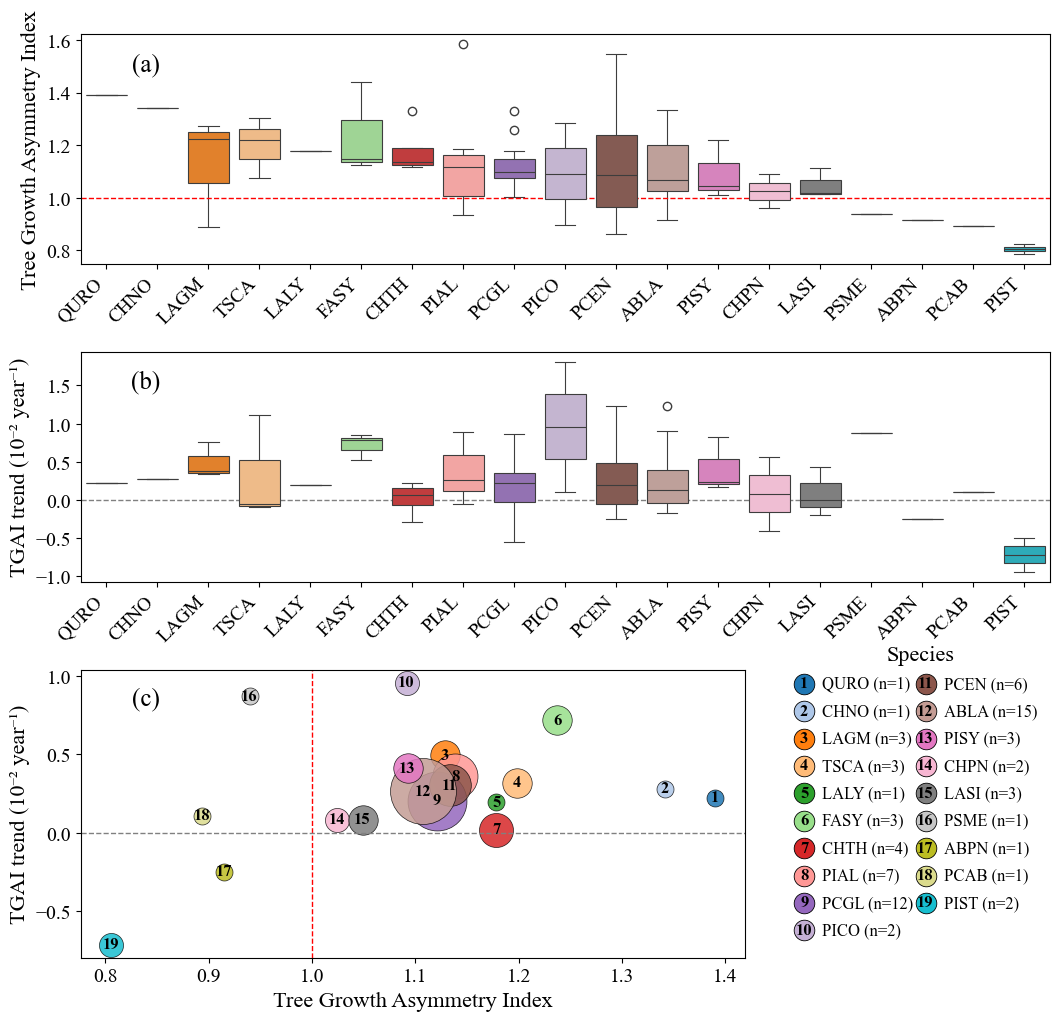

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


df_plot2 = df_plot.copy()
df_plot2["Slope_Mean_x100"] = df_plot2["Slope_Mean"] * 100
ss = (
    df_plot2.groupby("Tree_Speci", as_index=False)
    .agg(
        n_sites=("Mean", "count"),
        Mean_TGAI=("Mean", "mean"),
        Mean_Slope_x100=("Slope_Mean_x100", "mean")
    )
)

ss["Tree_Speci"] = pd.Categorical(ss["Tree_Speci"], categories=list(order), ordered=True)
ss = ss.sort_values("Tree_Speci").reset_index(drop=True)
ss["sp_id"] = np.arange(1, len(ss) + 1)
def sig2(x, pos):
    if x == 0 or np.isclose(x, 0):
        return "0"
    return f"{x:.2g}"

# yfmt = FuncFormatter(sig2)

fig = plt.figure(figsize=(12.5, 12.0))
gs = fig.add_gridspec(
    3, 2,
    height_ratios=[1.0, 1.0, 1.25],
    width_ratios=[0.72, 0.28],
    hspace=0.35, wspace=0.10
)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, 0])
axL = fig.add_subplot(gs[2, 1])

# -----------------------
# A) Mean boxplot（全宽）
# -----------------------
sns.boxplot(
    data=df_plot,
    x="Tree_Speci", y="Mean",
    order=order,
    palette=palette,
    showfliers=True,
    linewidth=0.8,
    ax=ax1
)
ax1.axhline(1, ls="--", color="red", lw=1)
ax1.set_ylabel("Tree Growth Asymmetry Index")
ax1.yaxis.set_ticks([0.8, 1.0, 1.2, 1.4, 1.6])
ax1.text(-2.5, 3.1, "(a)", transform=axL.transAxes, ha="center", va="center", fontsize=18)
ax1.set_xlabel("")
ax1.tick_params(axis="x", labelrotation=45)
for lbl in ax1.get_xticklabels():
    lbl.set_horizontalalignment("right")
# ax1.yaxis.set_major_formatter(yfmt)

ax1.set_title("")

sns.boxplot(
    data=df_plot2,
    x="Tree_Speci", y="Slope_Mean_x100",
    order=order,
    palette=palette,
    showfliers=True,
    linewidth=0.8,
    ax=ax2
)
ax2.axhline(0, ls="--", color="gray", lw=1)
ax2.set_ylabel("TGAI trend (10⁻² year⁻¹)")
ax2.set_xlabel("")
ax2.yaxis.set_ticks([-1.0, -0.5, 0.0, 0.5, 1.0,1.5])
ax2.tick_params(axis="x", labelrotation=45)
ax2.text(-2.5, 2.0, "(b)", transform=axL.transAxes, ha="center", va="center",fontsize=18)
for lbl in ax2.get_xticklabels():
    lbl.set_horizontalalignment("right")
# ax2.yaxis.set_major_formatter(yfmt)
# -----------------------
# C) Scatter（左下）
# -----------------------
for _, r in ss.iterrows():
    sp = r["Tree_Speci"]
    if pd.isna(sp):
        continue

    ax3.scatter(
        r["Mean_TGAI"], r["Mean_Slope_x100"],
        s=max(int(r["n_sites"]), 1) * 150,
        color=palette[sp],
        alpha=0.85,
        edgecolor="black",
        linewidth=0.5,
        zorder=2
    )
    ax3.text(
        r["Mean_TGAI"], r["Mean_Slope_x100"],
        str(int(r["sp_id"])),
        ha="center", va="center",
        fontsize=12, fontweight="bold",
        zorder=3
    )

ax3.axvline(1, color="red", ls="--", lw=1)
ax3.axhline(0, color="gray", ls="--", lw=1)
ax3.set_xlabel("Tree Growth Asymmetry Index")
ax3.set_ylabel("TGAI trend (10⁻² year⁻¹)")
# ax3.yaxis.set_major_formatter(yfmt)
ax3.text(-2.5, 0.9, "(c)", transform=axL.transAxes, ha="center", va="center",fontsize=18)
axL.axis("off")
# axL.set_title("Species") 

items = []
for _, r in ss.iterrows():
    sp = r["Tree_Speci"]
    if pd.isna(sp):
        continue
    items.append((int(r["sp_id"]), sp, int(r["n_sites"]), palette[sp]))

ncol = 2
n = len(items)
nrow = int(np.ceil(n / ncol))

x_cols = [0.05, 0.52]
y0 = 0.95
dy = 0.95 / max(nrow, 1)
circle_size = 220
fs_id = 12
fs_text = 12

for i, (sid, sp, nn, col) in enumerate(items):
    c = i // nrow
    rr = i % nrow
    x = x_cols[c]
    y = y0 - rr * dy

    axL.scatter(
        x, y,
        s=circle_size,
        color=col,
        edgecolor="black",
        linewidth=0.6,
        transform=axL.transAxes,
        zorder=2
    )
    axL.text(
        x, y, str(sid),
        transform=axL.transAxes,
        ha="center", va="center",
        fontsize=fs_id,
        fontweight="bold",
        color="black",
        zorder=3
    )
    axL.text(
        x + 0.07, y,
        f"{sp} (n={nn})",
        transform=axL.transAxes,
        ha="left", va="center",
        fontsize=fs_text
    )
axL.text(0.5, 1.05, "Species", transform=axL.transAxes, ha="center", va="center")
# plt.savefig(r'../Rawdat/Fig/FigS4.jpg', dpi=600, bbox_inches='tight')
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\3564590967.py:39: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


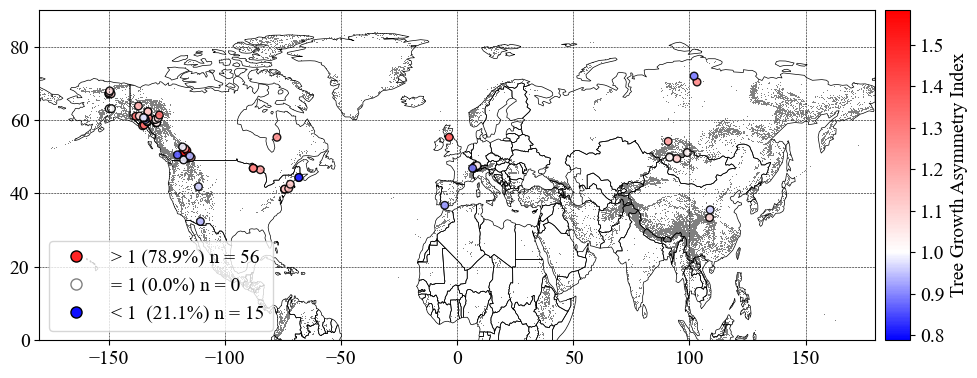

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import numpy as np
from matplotlib.lines import Line2D
import rasterio
from rasterio.plot import show
from matplotlib.colors import ListedColormap
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
tif_path = r"../Rawdat\GMBA_2021_MntnMask_EarthEnv_30s1Bit.tif"
with rasterio.open(tif_path) as src:
    mountain_mask = src.read(1)
    transform = src.transform
    bounds = src.bounds
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
mountain_cmap = ListedColormap(['white', 'gray'])
geometry = [Point(xy) for xy in zip(dfslope_3_N_P_mean['Longitude'], dfslope_3_N_P_mean['Latitude'])]
gdf = gpd.GeoDataFrame(dfslope_3_N_P_mean, geometry=geometry, crs='EPSG:4326')
conditions = [
    gdf['Mean'] > 1,
    gdf['Mean'] < 1,
    gdf['Mean'] == 1
]
choices = ['> 1', '< 1', '= 1']
gdf['mean_class'] = np.select(conditions, choices, default='= 1')
gdf_gt = gdf[gdf['mean_class'] == '> 1']
gdf_lt = gdf[gdf['mean_class'] == '< 1']
gdf_eq = gdf[gdf['mean_class'] == '= 1']
total = len(gdf)
p_gt = f"({len(gdf_gt)/total*100:.1f}%) n = {len(gdf_gt)} "
p_lt = f" ({len(gdf_lt)/total*100:.1f}%) n = {len(gdf_lt)}"
p_eq = f"({len(gdf_eq)/total*100:.1f}%) n = {len(gdf_eq)}"
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
vmin = gdf['Mean'].min()
vcenter = 1
vmax = gdf['Mean'].max()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = cm.bwr
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(mountain_mask, cmap=mountain_cmap, extent=extent, interpolation='none')
world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
if not gdf_eq.empty:
    gdf_eq.plot(
        ax=ax,
        facecolor='white',
        edgecolor='gray',
        linewidth=1.2,
        markersize=20,
        label='= 1 ' + p_eq
    )

if not gdf_gt.empty:
    gdf_gt.plot(
        ax=ax,
        column='Mean',
        cmap=cmap,
        norm=norm,
        markersize=30,
        edgecolor='k',
        alpha=0.9
    )

if not gdf_lt.empty:
    gdf_lt.plot(
        ax=ax,
        column='Mean',
        cmap=cmap,
        norm=norm,
        markersize=30,
        edgecolor='k',
        alpha=0.9
    )

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, cax=cax)
cb.set_label("Tree Growth Asymmetry Index")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'> 1 {p_gt}',
           markerfacecolor=cmap(norm(1.5)), markeredgecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'= 1 {p_eq}',
           markerfacecolor='white', markeredgecolor='gray', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'< 1 {p_lt}',
           markerfacecolor=cmap(norm(0.8)), markeredgecolor='k', markersize=8),
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=14, frameon=True)
ax.set_xlim(-180, 180)
ax.set_ylim(0, 90)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")
ax.set_aspect('auto')
ax.grid(True, linestyle='--', color='black', linewidth=0.4)

plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig1-A.jpg', dpi=600, bbox_inches='tight')
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\2150351818.py:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


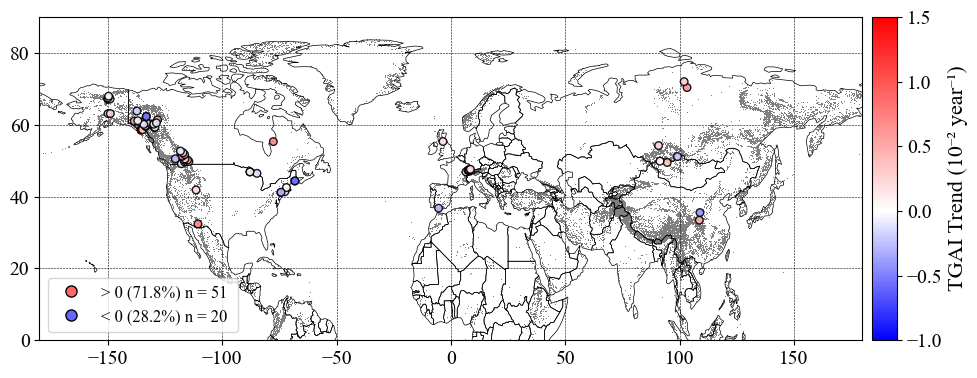

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import numpy as np
from matplotlib.lines import Line2D
import rasterio
from rasterio.plot import show
from matplotlib.colors import ListedColormap
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
tif_path = r"../Rawdat\GMBA_2021_MntnMask_EarthEnv_30s1Bit.tif"

with rasterio.open(tif_path) as src:
    mountain_mask = src.read(1)
    transform = src.transform
    bounds = src.bounds
    raster_crs = src.crs  

extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]
mountain_cmap = ListedColormap(['white', 'gray'])
geometry = [Point(xy) for xy in zip(dfslope_3_N_P_mean['Longitude'], dfslope_3_N_P_mean['Latitude'])]
gdf = gpd.GeoDataFrame(dfslope_3_N_P_mean, geometry=geometry, crs='EPSG:4326')

if raster_crs != gdf.crs:
    gdf = gdf.to_crs(raster_crs)

conditions = [
    gdf['Slope_Mean'] > 0,
    gdf['Slope_Mean'] < 0
]
choices = ['> 0', '< 0']
gdf['mean_class'] = np.select(conditions, choices, default=np.nan)

gdf_gt = gdf[gdf['mean_class'] == '> 0']
gdf_lt = gdf[gdf['mean_class'] == '< 0']
total = len(gdf_gt) + len(gdf_lt)
p_gt = f"({len(gdf_gt)/total*100:.1f}%) n = {len(gdf_gt)} "
p_lt = f"({len(gdf_lt)/total*100:.1f}%) n = {len(gdf_lt)} "

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

vmin = gdf['Slope_Mean'].min()
vcenter = 0
vmax = gdf['Slope_Mean'].max()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = cm.bwr

fig, ax = plt.subplots(figsize=(10, 4))

ax.imshow(mountain_mask, cmap=mountain_cmap, extent=extent, interpolation='none', zorder=0)

world.to_crs(gdf.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5, zorder=1)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

if not gdf_gt.empty:
    gdf_gt.plot(
        ax=ax, column='Slope_Mean', cmap=cmap, norm=norm,
        markersize=30, edgecolor='k', alpha=0.9, zorder=3
    )

if not gdf_lt.empty:
    gdf_lt.plot(
        ax=ax, column='Slope_Mean', cmap=cmap, norm=norm,
        markersize=30, edgecolor='k', alpha=0.9, zorder=3
    )


vmin = -1.0
vmax = 1.5
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = cm.bwr


sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cb = plt.colorbar(sm, cax=cax)
cb.set_ticks([-1.0, -0.5, 0, 0.5, 1.0, 1.5])
cb.set_label("TGAI Trend (10⁻² year⁻¹)", fontsize=16)
cb.ax.tick_params(labelsize=14)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'> 0 {p_gt}',
           markerfacecolor=cmap(norm(vmax*0.6)), markeredgecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'< 0 {p_lt}',
           markerfacecolor=cmap(norm(vmin*0.6)), markeredgecolor='k', markersize=8),
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=12, frameon=True)

ax.set_xlim(-180, 180)
ax.set_ylim(0, 90)
ax.set_aspect('auto')
ax.grid(True, linestyle='--', color='black', linewidth=0.4)

plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig2-A.jpg', dpi=600, bbox_inches='tight')
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\1317659519.py:48: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


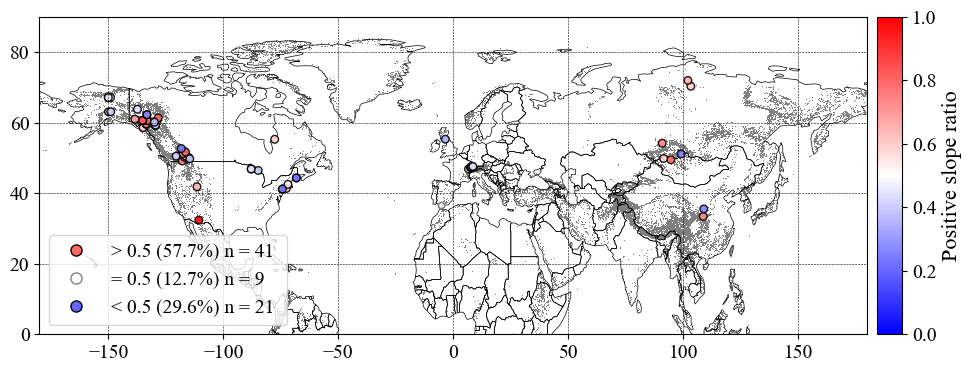

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import numpy as np
from matplotlib.lines import Line2D
import rasterio
from rasterio.plot import show
from matplotlib.colors import ListedColormap

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
tif_path = r"../Rawdat\GMBA_2021_MntnMask_EarthEnv_30s1Bit.tif"

with rasterio.open(tif_path) as src:
    mountain_mask = src.read(1)
    transform = src.transform
    bounds = src.bounds

extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

mountain_cmap = ListedColormap(['white', 'gray'])

geometry = [Point(xy) for xy in zip(dfslope_3_N_P_mean['Longitude'], dfslope_3_N_P_mean['Latitude'])]
gdf = gpd.GeoDataFrame(dfslope_3_N_P_mean, geometry=geometry, crs='EPSG:4326')

conditions = [
    gdf['Slope_P'] > 0.5,
    gdf['Slope_P'] < 0.5,
    gdf['Slope_P'] == 0.5
]
choices = ['> 0.5', '< 0.5', '= 0.5']
gdf['mean_class'] = np.select(conditions, choices, default='= 0.5')

gdf_gt = gdf[gdf['mean_class'] == '> 0.5']
gdf_lt = gdf[gdf['mean_class'] == '< 0.5']
gdf_eq = gdf[gdf['mean_class'] == '= 0.5']

total = len(gdf)
p_gt = f"({len(gdf_gt)/total*100:.1f}%) n = {len(gdf_gt)} "
p_lt = f"({len(gdf_lt)/total*100:.1f}%) n = {len(gdf_lt)}"
p_eq = f"({len(gdf_eq)/total*100:.1f}%) n = {len(gdf_eq)}"

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

vmin = gdf['Slope_P'].min()
vcenter = 0.5
vmax = gdf['Slope_P'].max()
norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
cmap = cm.bwr

fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(mountain_mask, cmap=mountain_cmap, extent=extent, interpolation='none')

world.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)

if not gdf_eq.empty:
    gdf_eq.plot(
        ax=ax,
        facecolor='white',
        edgecolor='gray',
        linewidth=1.2,
        markersize=20,
        label='= 1 ' + p_eq
    )

if not gdf_gt.empty:
    gdf_gt.plot(
        ax=ax,
        column='Slope_P',
        cmap=cmap,
        norm=norm,
        markersize=30,
        edgecolor='k',
        alpha=0.9
    )

if not gdf_lt.empty:
    gdf_lt.plot(
        ax=ax,
        column='Slope_P',
        cmap=cmap,
        norm=norm,
        markersize=30,
        edgecolor='k',
        alpha=0.9
    )

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, cax=cax)
cb.set_label("Positive slope ratio")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'> 0.5 {p_gt}',
           markerfacecolor=cmap(norm(0.8)), markeredgecolor='k', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'= 0.5 {p_eq}',
           markerfacecolor='white', markeredgecolor='gray', markersize=8),
    Line2D([0], [0], marker='o', color='w', label=f'< 0.5 {p_lt}',
           markerfacecolor=cmap(norm(0.2)), markeredgecolor='k', markersize=8),
]
ax.legend(handles=legend_elements, loc='lower left', fontsize=14, frameon=True)
ax.set_xlim(-180, 180)
ax.set_ylim(0, 90)
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")
ax.set_aspect('auto')
ax.grid(True, linestyle='--', color='black', linewidth=0.4)

plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/FigS2.jpg', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
if not hasattr(np, "alen"):
    np.alen = lambda a: len(a)
import geopandas as gpd
import xarray as xr
import pandas as pd
import numpy as np
pre_path = r"../Rawdat\cru_ts4.07.1901.2022.pre.dat.nc"
tmp_path = r"../Rawdat\cru_ts4.07.1901.2022.tmp.dat.nc"
gdf = gdf.copy()
if 'Longitude' not in gdf.columns or 'Latitude' not in gdf.columns:
    gdf['Longitude'] = gdf.geometry.x
    gdf['Latitude'] = gdf.geometry.y
ds_pre = xr.open_dataset(pre_path)
ds_tmp = xr.open_dataset(tmp_path)
gs_months = np.arange(3, 11)
pre = ds_pre['pre']  # mm/month
pre_gs = pre.where(pre['time'].dt.month.isin(gs_months), drop=True)
pre_gs_annual = pre_gs.groupby('time.year').sum(dim='time')
pre_gs_clim = pre_gs_annual.mean(dim='year')
tmp = ds_tmp['tmp']  # °C
tmp_gs = tmp.where(tmp['time'].dt.month.isin(gs_months), drop=True)
tmp_gs_annual = tmp_gs.groupby('time.year').mean(dim='time')
tmp_gs_clim = tmp_gs_annual.mean(dim='year')
lon_points = xr.DataArray(gdf['Longitude'].values, dims=('points',))
lat_points = xr.DataArray(gdf['Latitude'].values, dims=('points',))
pre_gs_vals = pre_gs_clim.interp(lon=lon_points, lat=lat_points, method='linear').values
tmp_gs_vals = tmp_gs_clim.interp(lon=lon_points, lat=lat_points, method='linear').values
gdf['Pre_GS'] = pre_gs_vals 
gdf['Tmp_GS'] = tmp_gs_vals        
# print(gdf[['Longitude', 'Latitude', 'Pre_GS', 'Tmp_GS']].head())
df_meanC = gdf.dropna(subset=['Pre_GS', 'Tmp_GS', 'Mean']).copy()


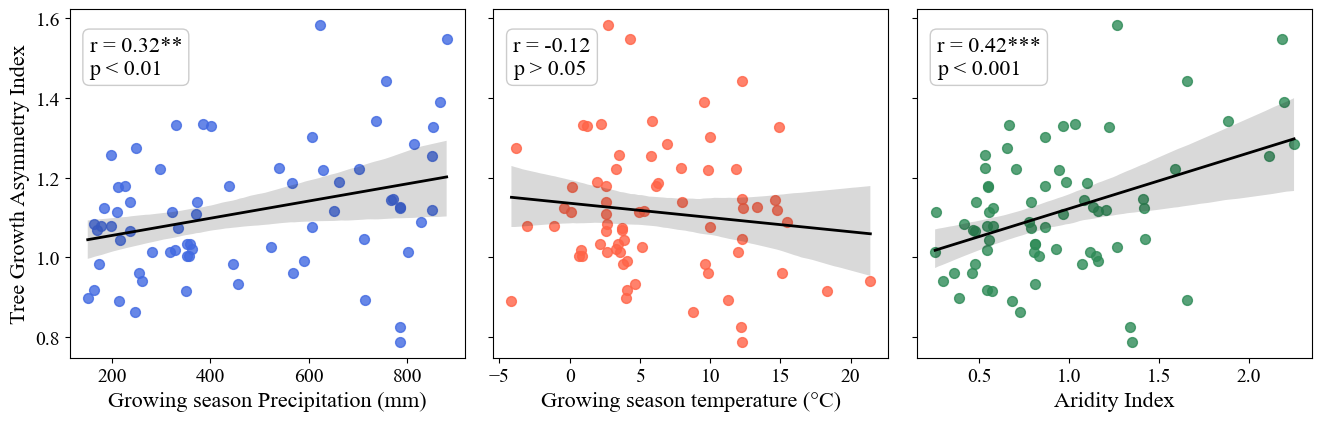

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

variables = [
    ('Pre_GS', 'Growing season Precipitation (mm)', 'royalblue'),
    # ('Pre_GS', 'Mean Annual Precipitation (mm)', 'royalblue'),

    ('Tmp_GS', 'Growing season temperature (°C)', 'tomato'),
    # ('Tmp_GS', 'Mean Annual temperature (°C)', 'tomato'),
    # ('ai_v3', 'Aridity Index', 'seagreen')
    ('ai_v3', 'Aridity Index', 'seagreen')
]

# y_limits = (0.7, 1.6)
# y_ticks = [0.8, 1.0, 1.2, 1.4, 1.6]

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.5), sharey=True)

for ax, (var, xlabel, color) in zip(axes, variables):
    x = df_meanC[var]
    y = df_meanC['Mean']

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    if p_value < 0.001:
        signif = '***'
        p_label = 'p < 0.001'
    elif p_value < 0.01:
        signif = '**'
        p_label = 'p < 0.01'
    elif p_value < 0.05:
        signif = '*'
        p_label = 'p < 0.05'
    else:
        signif = ''
        p_label = 'p > 0.05'

    r_text = f"r = {r_value:.2f}{signif}\n{p_label}"

    sns.regplot(
        x=x, y=y, ax=ax,
        scatter_kws={'alpha': 0.8, 'color': color, 's': 50},
        line_kws={'color': 'black', 'lw': 2},
        ci=95
    )

    ax.set_xlabel(xlabel)
    # ax.set_ylim(*y_limits)
    # ax.set_yticks(y_ticks)
    
    if ax == axes[0]:
        ax.set_ylabel('Tree Growth Asymmetry Index')
    else:
        ax.set_ylabel('')

    ax.text(
        0.05, 0.80, r_text,
        transform=ax.transAxes,
        verticalalignment='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.4)
    )

plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig1-cde.jpg', dpi=600, bbox_inches='tight')
plt.show()


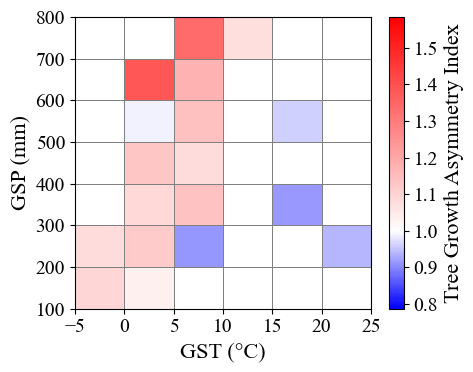

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

temp_bins = np.arange(-5, 30, 5)      # -10, -6, ..., 18
prec_bins = np.arange(100, 900, 100)  # 200, 400, ..., 2000
# temp_bins = np.arange(-20, 25, 5)      # -10, -6, ..., 18
# prec_bins = np.arange(200, 2000, 200)  # 200, 400, ..., 2000
df_meanC['temp_bin'] = pd.cut(df_meanC['Tmp_GS'], bins=temp_bins, include_lowest=True, right=False)
df_meanC['prec_bin'] = pd.cut(df_meanC['Pre_GS'], bins=prec_bins, include_lowest=True, right=False)

pivot_table = df_meanC.pivot_table(values='Mean', index='prec_bin', columns='temp_bin', aggfunc='mean')

temp_index = pd.IntervalIndex.from_breaks(temp_bins, closed='left')
prec_index = pd.IntervalIndex.from_breaks(prec_bins, closed='left')
pivot_table = pivot_table.reindex(index=prec_index, columns=temp_index)
z = pivot_table.to_numpy()

x_edges = temp_bins
y_edges = prec_bins

assert z.shape == (len(y_edges) - 1, len(x_edges) - 1)
fig, ax = plt.subplots(figsize=(5, 4))

norm = mcolors.TwoSlopeNorm(vmin=df_meanC['Mean'].min(), vcenter=1.0, vmax=df_meanC['Mean'].max())
cmap = plt.get_cmap('bwr')

mesh = ax.pcolormesh(x_edges, y_edges, z,
                     cmap=cmap, norm=norm,
                     edgecolors='gray', linewidth=0.5)

ax.set_xticks(temp_bins)
ax.set_yticks(prec_bins)

ax.set_xlabel("GST (°C)", fontsize=16)
ax.set_ylabel("GSP (mm)", fontsize=16)
# ax.set_xlabel("MAT (°C)", fontsize=16)
# ax.set_ylabel("MAP (mm)", fontsize=16)
ax.tick_params(labelsize=14)
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label("Tree Growth Asymmetry Index", fontsize=16)
plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig1-b.jpg', dpi=600, bbox_inches='tight')
plt.show()


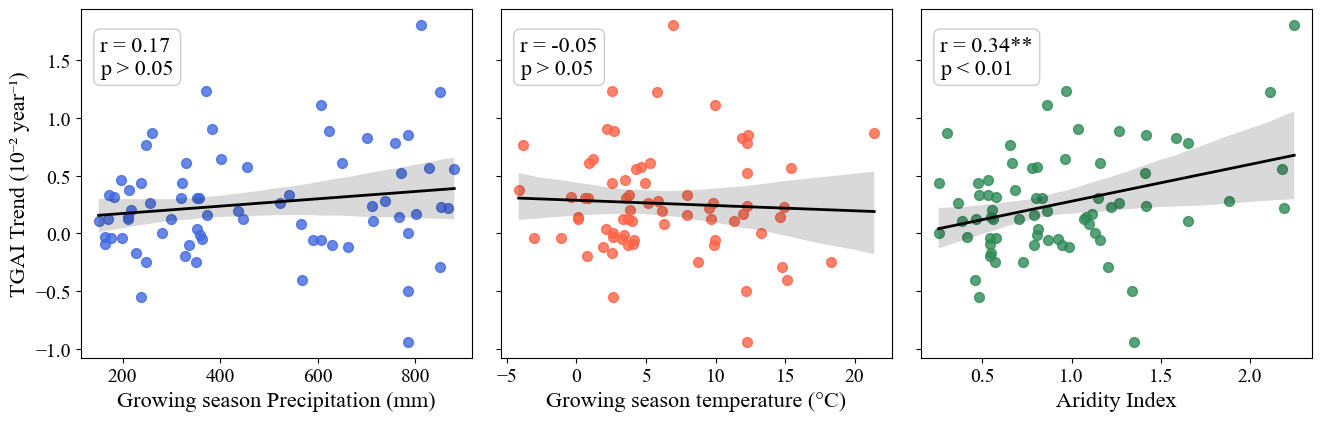

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

variables = [
    ('Pre_GS', 'Growing season Precipitation (mm)', 'royalblue'),
    # ('Pre_GS', 'Mean Annual Precipitation (mm)', 'royalblue'),

    ('Tmp_GS', 'Growing season temperature (°C)', 'tomato'),
    # ('Tmp_GS', 'Mean Annual temperature (°C)', 'tomato'),
    # ('ai_v3', 'Aridity Index', 'seagreen')
    ('ai_v3', 'Aridity Index', 'seagreen')
]

# y_limits = (0.7, 1.6)
y_ticks = [-1.0, -0.5, 0, 0.5, 1.0, 1.5]
y_label = "TGAI Trend (10⁻² year⁻¹)"


fig, axes = plt.subplots(1, 3, figsize=(13.5, 4.5), sharey=True)

for ax, (var, xlabel, color) in zip(axes, variables):
    x = df_meanC[var]
    y = df_meanC['Slope_Mean']* 100

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    if p_value < 0.001:
        signif = '***'
        p_label = 'p < 0.001'
    elif p_value < 0.01:
        signif = '**'
        p_label = 'p < 0.01'
    elif p_value < 0.05:
        signif = '*'
        p_label = 'p < 0.05'
    else:
        signif = ''
        p_label = 'p > 0.05'

    r_text = f"r = {r_value:.2f}{signif}\n{p_label}"

    sns.regplot(
        x=x, y=y, ax=ax,
        scatter_kws={'alpha': 0.8, 'color': color, 's': 50},
        line_kws={'color': 'black', 'lw': 2},
        ci=95
    )

    ax.set_xlabel(xlabel)
    # ax.set_ylim(*y_limits)
    # ax.set_yticks(y_ticks)
    
    if ax == axes[0]:
        ax.set_ylabel(y_label)
    else:
        ax.set_ylabel('')
    ax.text(
        0.05, 0.80, r_text,
        transform=ax.transAxes,
        verticalalignment='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.4)
    )

plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig2-cde.jpg', dpi=600, bbox_inches='tight')
plt.show()

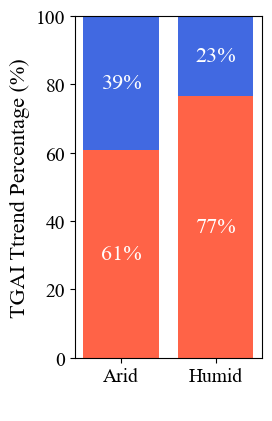

In [14]:
df_meanC['climate_zone'] = np.where(df_meanC['ai_v3'] < 0.65, 'Arid', 'Humid')
def calc_positive_slope_ratio(group):
    total = len(group)
    positive = (group['Slope_Mean'] > 0).sum()
    return round(positive / total, 3) if total > 0 else np.nan

slope_ratio = df_meanC.groupby('climate_zone').apply(calc_positive_slope_ratio).rename('Positive_Slope_Ratio')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
df_meanC['Trend'] = df_meanC['Slope_Mean'].apply(lambda x: 'Increasing' if x > 0 else 'Decreasing')
df_percent = (
    df_meanC.groupby(['climate_zone', 'Trend'])
       .size()
       .reset_index(name='Count')
       .pivot(index='climate_zone', columns='Trend', values='Count')
       .fillna(0)
)
df_percent['Total'] = df_percent.sum(axis=1)
df_percent['Increasing_%'] = df_percent['Increasing'] / df_percent['Total'] * 100
df_percent['Decreasing_%'] = df_percent['Decreasing'] / df_percent['Total'] * 100
fig, ax = plt.subplots(figsize=(3, 4.5))
climate_zones = df_percent.index.tolist()
increasing = df_percent['Increasing_%'].values
decreasing = df_percent['Decreasing_%'].values
ax.bar(climate_zones, increasing, label='Increasing', color='tomato')
ax.bar(climate_zones, decreasing, bottom=increasing, label='Decreasing', color='royalblue')
ax.set_ylabel('TGAI Ttrend Percentage (%)', fontsize=16)
ax.set_xlabel(' ')
ax.set_ylim(0, 100)

for i, (inc, dec) in enumerate(zip(increasing, decreasing)):
    ax.text(i, inc / 2, f'{inc:.0f}%', ha='center', va='center', color='white', fontsize=16)
    ax.text(i, inc + dec / 2, f'{dec:.0f}%', ha='center', va='center', color='white', fontsize=16)
plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig2-b.jpg', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
dfslope_3_N_P_mean.columns =['Latitude', 'Longitude', 'Slope_P', 'Mean', 'Slope_Mean', 'AI',
       'Tree_Speci', 'site']
import os
import pandas as pd
import numpy as np
folder = r"../Rawdat/RWL_files"
target_sites = dfslope_3_N_P_mean['site'].str.upper().unique()
prefix_filter = set(df_AI['Prefix'].unique()) 
records = []

for site in target_sites:
    filename = site + ".rwl.csv"
    filepath = os.path.join(folder, filename)

    if not os.path.exists(filepath):
        print(f"⚠️：{filename}")
        continue

    try:
        df = pd.read_csv(filepath, index_col=0)
        df.index = df.index.astype(int)
        df.columns = [col.upper() for col in df.columns]
        df = df[(df.index >= 1901) & (df.index <= 2015)]
    except Exception as e:
        print(f"❌  {filename}：{e}")
        continue

    all_cols = df.columns.tolist()

    for col in all_cols:
        if col.endswith("N"):
            prefix = col[:-1]
            if prefix not in prefix_filter:
                continue  

            col_n = col
            col_s = prefix + "S"
            if col_s in all_cols:
                s_vals = df[col_s]
                n_vals = df[col_n]
                sn_ratio = s_vals / n_vals
                sn_ratio = sn_ratio.replace([np.inf, -np.inf], np.nan).dropna()

                df_ratio = pd.DataFrame({
                    "Year": sn_ratio.index,
                    "Prefix": prefix,
                    "site": site,
                    "SN_Ratio": sn_ratio.values
                })
                records.append(df_ratio)

if records:
    df_all_sn = pd.concat(records, ignore_index=True)
else:
    print("⚠️ ")
lower_bound = df_all_sn['SN_Ratio'].quantile(0.01)  
upper_bound = df_all_sn['SN_Ratio'].quantile(0.99)  
df_filtered = df_all_sn[(df_all_sn['SN_Ratio'] >= lower_bound) & (df_all_sn['SN_Ratio'] <= upper_bound)]
dfslope_3_N_P_mean['site'] = dfslope_3_N_P_mean['site'].str.strip().str.lower()
df_filtered['site'] = df_filtered['site'].str.strip().str.lower()
df_filtered = df_filtered.merge(
    dfslope_3_N_P_mean[['site', 'AI']],
    on='site',
    how='left'  
)
df_filtered['climate_zone'] = df_filtered['AI'].apply(
    lambda x: 'arid' if x < 0.65 else 'humid'
)
# df_filtered.to_csv(r'../Rawdat/Fig\TGAI71.csv', index=False)

C:\Users\MSI\AppData\Local\Temp\ipykernel_46560\1095064122.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['site'] = df_filtered['site'].str.strip().str.lower()


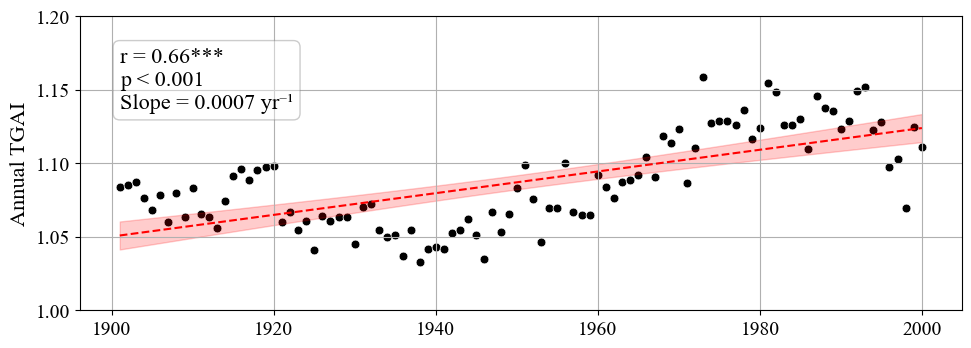

In [17]:
df_filtered_2000 = df_filtered[df_filtered['Year']<=2000]
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
import statsmodels.api as sm
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
df_grouped = df_filtered_2000.groupby('Year')['SN_Ratio'].mean().reset_index()
x = df_grouped['Year']
y = df_grouped['SN_Ratio']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
pred = model.get_prediction(X)
ci = pred.conf_int()
mean_pred = pred.predicted_mean
if p_value < 0.001:
    signif = '***'
    p_label = 'p < 0.001'
elif p_value < 0.01:
    signif = '**'
    p_label = 'p < 0.01'
elif p_value < 0.05:
    signif = '*'
    p_label = 'p < 0.05'
else:
    signif = ''
    p_label = 'p ≥ 0.05'
textstr = '\n'.join((
    f'r = {r_value:.2f}{signif}',
    f'{p_label}',
    f'Slope = {slope:.4f} yr⁻¹'
))
plt.figure(figsize=(10, 4))
sns.scatterplot(x=x, y=y, color='black', s=40)
plt.plot(x, mean_pred, color='red', linestyle='--', label='Linear Fit')
plt.fill_between(x, ci[:, 0], ci[:, 1], color='red', alpha=0.2, label='95% CI')
plt.text(x.min(), y.max()+0.02, textstr,
         verticalalignment='top',
         fontsize=16,
         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.4))
plt.xlabel("")
plt.ylabel("Annual TGAI")
plt.tight_layout()
plt.yticks([1.0,1.05, 1.1,1.15, 1.2])
# plt.ylim(0.95,1.25)
plt.grid(True)
# plt.savefig(r'../Rawdat/Fig/Fig3-A.jpg', dpi=600, bbox_inches='tight')
plt.show()



=== ANCOVA  ===
                  sum_sq     df           F        PR(>F)
C(Region)       0.035546    1.0   44.275960  2.784767e-10
Year            0.088655    1.0  110.428441  8.993271e-21
Year:C(Region)  0.000272    1.0    0.338691  5.612548e-01
Residual        0.157354  196.0         NaN           NaN


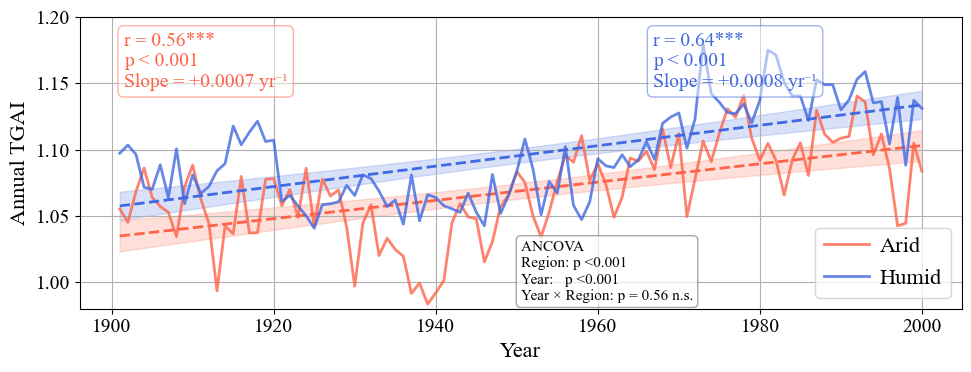

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_filtered_2000 = df_filtered[df_filtered['Year']<=2000]
df_arid = df_filtered_2000[df_filtered_2000['AI'] < 0.65]
df_humid = df_filtered_2000[df_filtered_2000['AI'] >= 0.65]
df_arid_grouped = df_arid.groupby('Year')['SN_Ratio'].mean().reset_index()
df_humid_grouped = df_humid.groupby('Year')['SN_Ratio'].mean().reset_index()
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
df_arid = df_filtered_2000[df_filtered_2000['AI'] < 0.65].copy()
df_humid = df_filtered_2000[df_filtered_2000['AI'] >= 0.65].copy()
df_arid_grouped = (
    df_arid.groupby('Year', as_index=False)['SN_Ratio']
           .mean()
)
df_humid_grouped = (
    df_humid.groupby('Year', as_index=False)['SN_Ratio']
            .mean()
)
df_arid_grouped['Region'] = 'Arid'
df_humid_grouped['Region'] = 'Humid'
df_all = pd.concat([df_arid_grouped, df_humid_grouped], ignore_index=True)
model = ols("SN_Ratio ~ Year * C(Region)", data=df_all).fit()
ancova_res = anova_lm(model, typ=2)

print("\n=== ANCOVA  ===")
print(ancova_res)

p_region = ancova_res.loc["C(Region)", "PR(>F)"]
p_year = ancova_res.loc["Year", "PR(>F)"]
p_inter = ancova_res.loc["Year:C(Region)", "PR(>F)"]

def signif_star(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "n.s."

ancova_text = (
    "ANCOVA \n"
    f"Region: p <0.001 \n"
    f"Year:   p <0.001\n"
    f"Year × Region: p = {p_inter:.2g} {signif_star(p_inter)}"
)

# =========================
# Plotting: Two broken lines + fitted line + regression line 95% CI
# =========================
fig, ax = plt.subplots(figsize=(10, 4))

def plot_line_with_trend(data, color, label, xpos, ax):

    data = data.sort_values('Year')
    x = data['Year'].values
    y = data['SN_Ratio'].values


    ax.plot(x, y, '-', color=color, alpha=0.8, label=label, linewidth=2)


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    y_pred = intercept + slope * x
    ax.plot(x, y_pred, color=color, linestyle='--', linewidth=2)


    n = len(x)
    t_val = stats.t.ppf(0.975, df=n - 2)  
    s_err = np.sqrt(np.sum((y - y_pred) ** 2) / (n - 2))
    x_mean = np.mean(x)
    sxx = np.sum((x - x_mean) ** 2)
    conf = t_val * s_err * np.sqrt(1.0 / n + (x - x_mean) ** 2 / sxx)
    lower = y_pred - conf
    upper = y_pred + conf
    ax.fill_between(x, lower, upper, color=color, alpha=0.2)


    if p_value < 0.001:
        signif = '***'
        p_label = 'p < 0.001'
    elif p_value < 0.01:
        signif = '**'
        p_label = 'p < 0.01'
    elif p_value < 0.05:
        signif = '*'
        p_label = 'p < 0.05'
    else:
        signif = ''
        p_label = 'p ≥ 0.05'


    textstr = f"r = {r_value:.2f}{signif}\n{p_label}\nSlope = {slope:+.4f} yr⁻¹"
    ax.text(
        xpos, 0.95, textstr,
        transform=ax.transAxes,
        fontsize=14,
        verticalalignment='top',
        color=color,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=color, alpha=0.5)
    )


plot_line_with_trend(
    df_arid_grouped[['Year', 'SN_Ratio']], 
    color='tomato', label='Arid', xpos=0.05, ax=ax
)


plot_line_with_trend(
    df_humid_grouped[['Year', 'SN_Ratio']], 
    color='royalblue', label='Humid', xpos=0.65, ax=ax
)


ax.text(
    0.5, 0.02, ancova_text,
    transform=ax.transAxes,
    fontsize=11,
    va='bottom', ha='left',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
)


ax.set_xlabel('Year')
ax.set_ylabel('Annual TGAI')
ax.legend(
    loc='lower right', frameon=True, ncol=1,
    handletextpad=0.5, columnspacing=1.0
)
ax.grid(True)
ax.set_ylim(0.98, 1.2)
# ax.set_yticks([ 0.9, 1.0, 1.1, 1.2])
plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/Fig3-A.jpg', dpi=600, bbox_inches='tight')
plt.show()

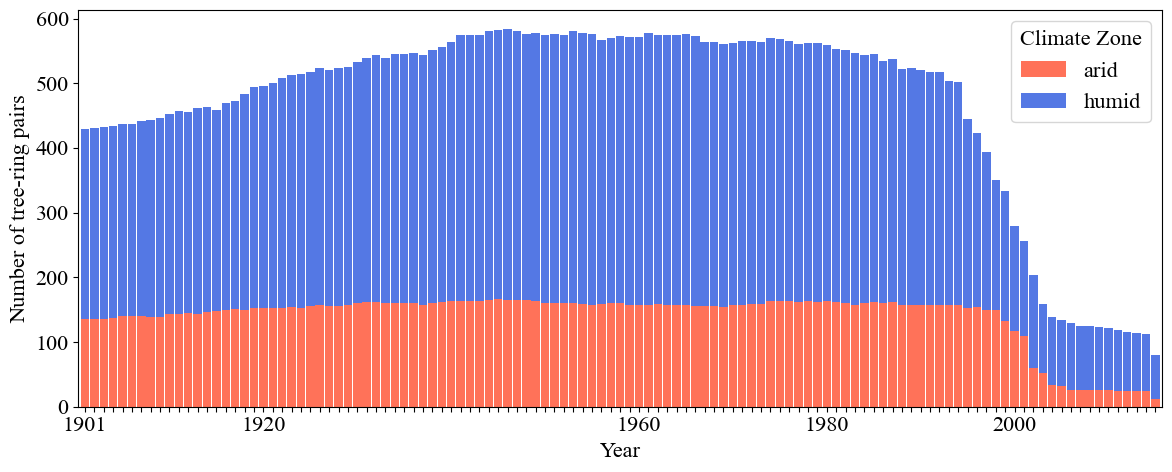

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
pivot_df = df_filtered.groupby(['Year', 'climate_zone']).size().unstack(fill_value=0)
pivot_df = pivot_df.sort_index()

custom_colors = ['tomato','royalblue']  


xtick_years = [1901, 1920, 1960, 1980, 2000]


ax = pivot_df.plot(
    kind='bar',
    stacked=True,
    width = 0.9,
    alpha=0.9,
    figsize=(12, 5),
    color=custom_colors[:len(pivot_df.columns)]  
)


ax.set_xlabel('Year')
ax.set_ylabel('Number of tree-ring pairs')
ax.set_xticks(range(len(pivot_df.index)))
new_labels = [str(year) if year in xtick_years else '' for year in pivot_df.index]
ax.set_xticklabels(new_labels, rotation=0)
plt.legend(title='Climate Zone')
plt.tight_layout()
# plt.savefig(r'../Rawdat/Fig/FigS1.jpg', dpi=600, bbox_inches='tight')
plt.show()
